In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
all_jobs = pd.read_csv('all_jobs_cleaned.csv')
all_jobs.dropna(inplace=True)
all_jobs.head()

job_title_clean                  company  \
0                direct data entry operator         westamerica bank   
2                                 data aide      stanford university   
3  field applications engineer  data center             amphenol tcs   
4                        analyst youthtruth               cep global   
5   applied scientist frontier ai  robotics  amazon.com services llc   

         date                                              blurb  \
0  10/17/2024  as a direct data entry operator, under general...   
2   10/3/2024  develop and apply novel clinical data curation...   
3  10/22/2024  amphenol high speed and commercial products gr...   
4   10/3/2024  over time, contribute insights to new features...   
5  10/24/2024  phd in engineering, technology, computer scien...   

                                                tags  \
0    Job types: Full-time\r\nJob types cc: Full-time   
2    Job types: Full-time\r\nJob types cc: Full-time   
3  Benefits: Paid holidays, Disability insurance,...   
4  Benefits: Dental insurance, 401(k), Flexible s...   
5  Job types: Full-time\r\nBenefits: Health insur...   

                                                link  \
0  https://www.indeed.com/m/viewjob?jk=9af5925791...   
2  https://www.indeed.com/m/viewjob?jk=db7d847fbf...   
3  https://www.indeed.com/m/viewjob?jk=cfb3f4f072...   
4  https://www.indeed.com/m/viewjob?jk=9365df687b...   
5  https://www.indeed.com/m/viewjob?jk=b406677342...   

                                     id remoteness state           city  \
0  IndeedScraperUSAEng_9af5925791536fd2    unknown    ca      fairfield   
2  IndeedScraperUSAEng_db7d847fbf8a9612    unknown    ca       stanford   
3  IndeedScraperUSAEng_cfb3f4f072371529    unknown    ca    santa clara   
4  IndeedScraperUSAEng_9365df687b5694e9    unknown    ca  san francisco   
5  IndeedScraperUSAEng_b406677342fbc627    unknown    ca  san francisco   

  wage_type  converted_yearly_lower  converted_yearly_upper  
0    hourly                 33280.0                 35505.6  
2    hourly                 64916.8                 74048.0  
3    yearly                 80750.0                148870.0  
4    yearly                 90756.0                 90756.0  
5    yearly                136000.0                222200.0

In [44]:
all_jobs['title_blurb'] = all_jobs['job_title_clean'] + ' ' + all_jobs['blurb']

In [76]:
vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 words
title_blurb_vectorized = vectorizer.fit_transform(all_jobs['title_blurb'])
company_vectorized = vectorizer.fit_transform(all_jobs['company'])

#text_combined = hstack([title_blurb_vectorized, company_vectorized])
text_combined = title_blurb_vectorized

In [46]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
text_pca = pca.fit_transform(text_combined.toarray())

In [39]:
text_pca

array([[ 0.18408669,  1.38190855],
       [ 2.1969243 ,  0.68044889],
       [-1.93309506,  0.70903638],
       ...,
       [-0.57604892,  1.46672408],
       [-2.20855664, -0.5722556 ],
       [ 1.49149784, -1.18776758]])

In [40]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(text_pca)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.75589311 0.24410689]


In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose an appropriate number of clusters
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

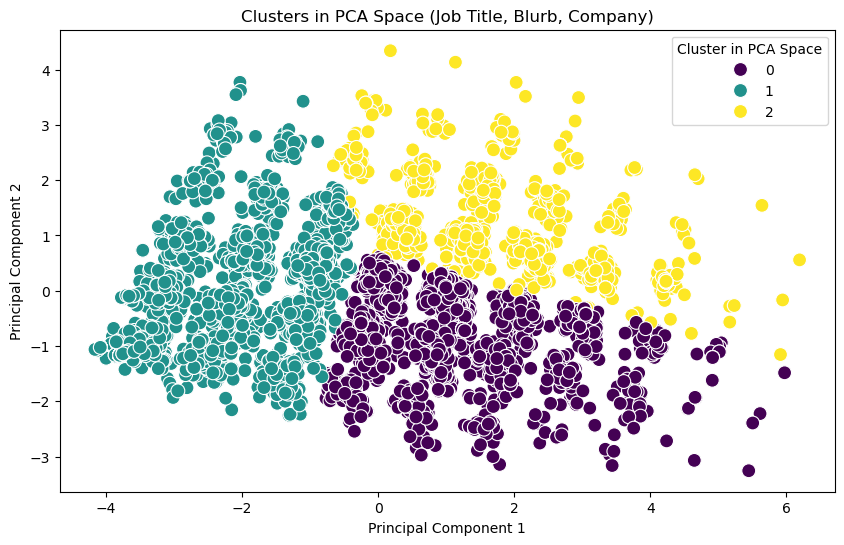

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters in PCA Space (Job Title, Blurb, Company)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster in PCA Space')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.35697816275642275


In [48]:
# Example of encoding categorical columns
state_encoded = pd.get_dummies(all_jobs[['state']])
state_encoded

state_ca  state_ct  state_nc  state_nj  state_ny  state_ok  state_pa  \
0          True     False     False     False     False     False     False   
2          True     False     False     False     False     False     False   
3          True     False     False     False     False     False     False   
4          True     False     False     False     False     False     False   
5          True     False     False     False     False     False     False   
...         ...       ...       ...       ...       ...       ...       ...   
10594     False     False      True     False     False     False     False   
10597     False     False      True     False     False     False     False   
10600     False     False      True     False     False     False     False   
10602     False     False      True     False     False     False     False   
10603     False     False      True     False     False     False     False   

       state_tx  state_va  
0         False     False  
2         False     False  
3         False     False  
4         False     False  
5         False     False  
...         ...       ...  
10594     False     False  
10597     False     False  
10600     False     False  
10602     False     False  
10603     False     False  

[6113 rows x 9 columns]

In [78]:
numeric_columns = ['converted_yearly_lower', 'converted_yearly_upper']
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(all_jobs[numeric_columns])
data_numeric_scaled

array([[-1.43633509, -1.33378497],
       [-0.81132501, -0.90125797],
       [-0.49852759, -0.06159735],
       ...,
       [-0.27054573,  0.0280673 ],
       [ 0.16625486, -0.30837152],
       [-0.91335973, -0.55878165]])

In [79]:
final_data = np.hstack([company_vectorized, state_encoded, data_numeric_scaled])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
final_data

In [69]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
text_pca = pca.fit_transform(final_data)
text_pca

array([[-1.81283306, -0.88408215],
       [-1.0753309 , -0.76714285],
       [-0.27089583, -0.7283181 ],
       ...,
       [-0.23400448, -0.05257314],
       [-0.16477007,  0.04934253],
       [-1.09171126, -0.16835481]])

In [70]:
text_pca

array([[-1.81283306, -0.88408215],
       [-1.0753309 , -0.76714285],
       [-0.27089583, -0.7283181 ],
       ...,
       [-0.23400448, -0.05257314],
       [-0.16477007,  0.04934253],
       [-1.09171126, -0.16835481]])

In [71]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(text_pca)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.86832176 0.13167824]


In [72]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose an appropriate number of clusters
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

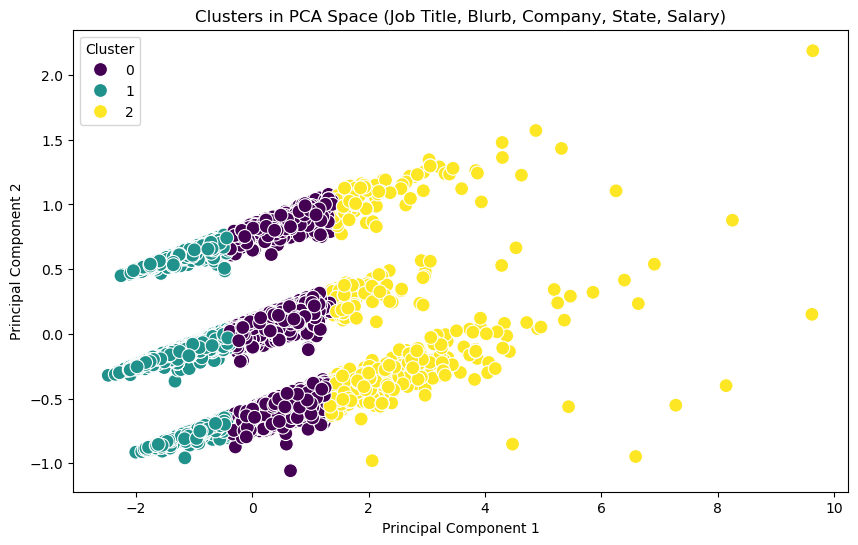

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters in PCA Space (Job Title, Blurb, Company, State, Salary)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [153]:
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3554502603985537
